In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

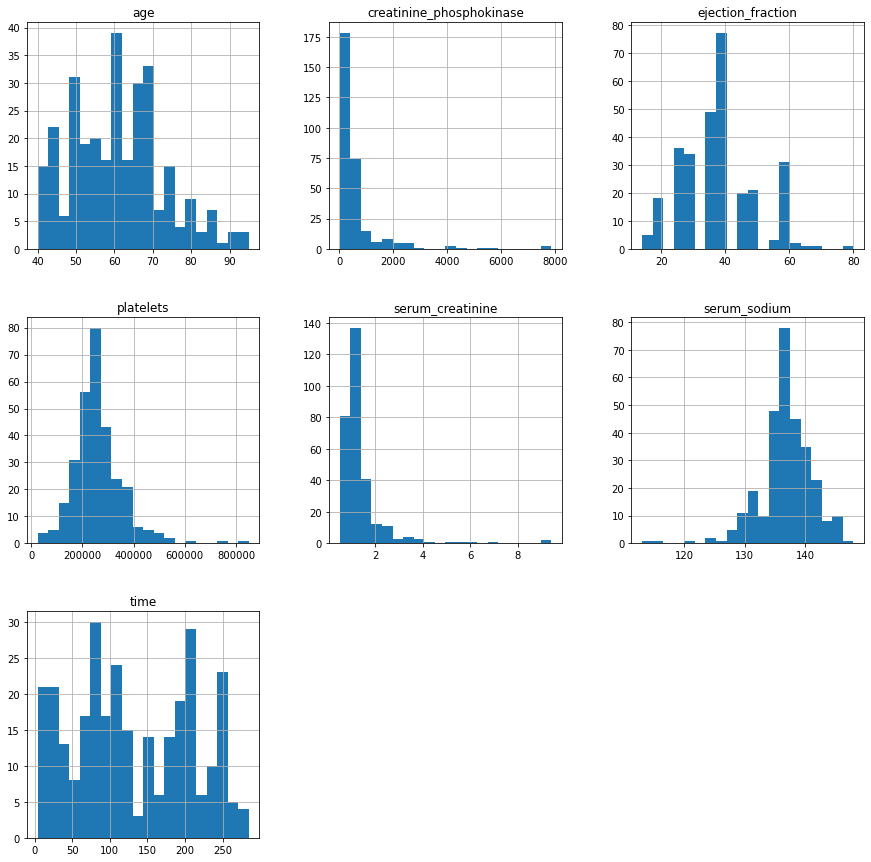

In [7]:
df[['age', 'creatinine_phosphokinase', 'ejection_fraction',
   'platelets', 'serum_creatinine', 'serum_sodium', 'time']].hist(bins=20,
                                                        figsize=(15, 15))
plt.show()

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df[['age', 'creatinine_phosphokinase', 'ejection_fraction',
   'platelets', 'serum_creatinine', 'serum_sodium', 'time']].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [10]:
df['sex1'] = df['sex'].replace({1: "Male", 0: "Female"})

In [14]:
df['death'] = df['DEATH_EVENT'].replace({1: 'yes', 0: 'no'})

In [15]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,sex1,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male,yes
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male,yes
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male,yes
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Male,yes
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Female,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,Male,no
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,Female,no
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,Female,no
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,Male,no


In [17]:
df['death'].value_counts()

no     203
yes     96
Name: death, dtype: int64

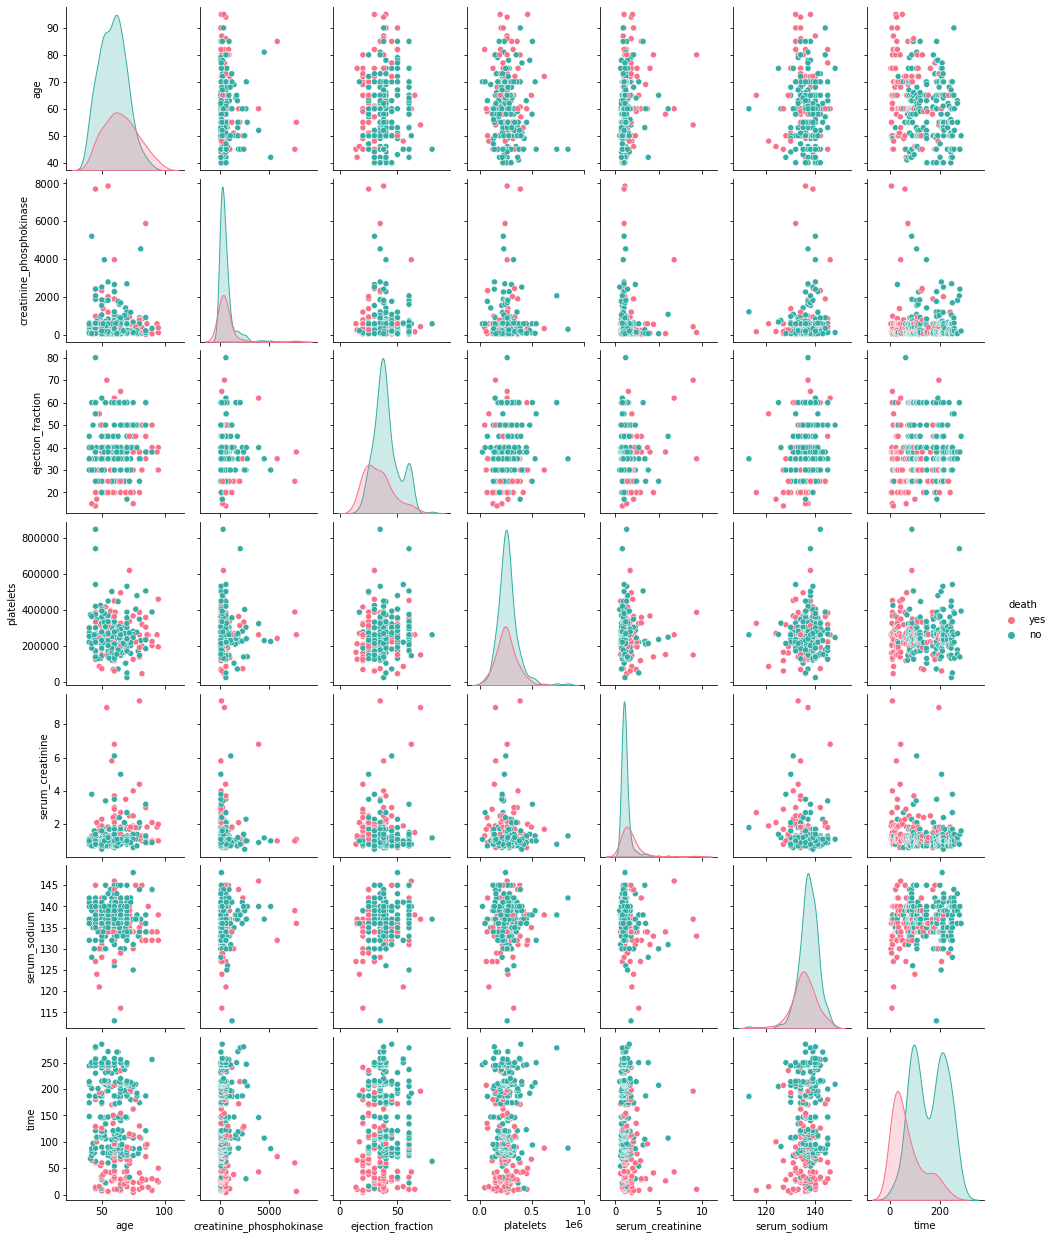

In [26]:
import seaborn as sns
sns.pairplot(df[['age', 'creatinine_phosphokinase', 'ejection_fraction',
   'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'death']],
            hue = 'death', diag_kind = "kde", kind='scatter', 
            palette='husl', height = 2.5, aspect = .8)
plt.show()

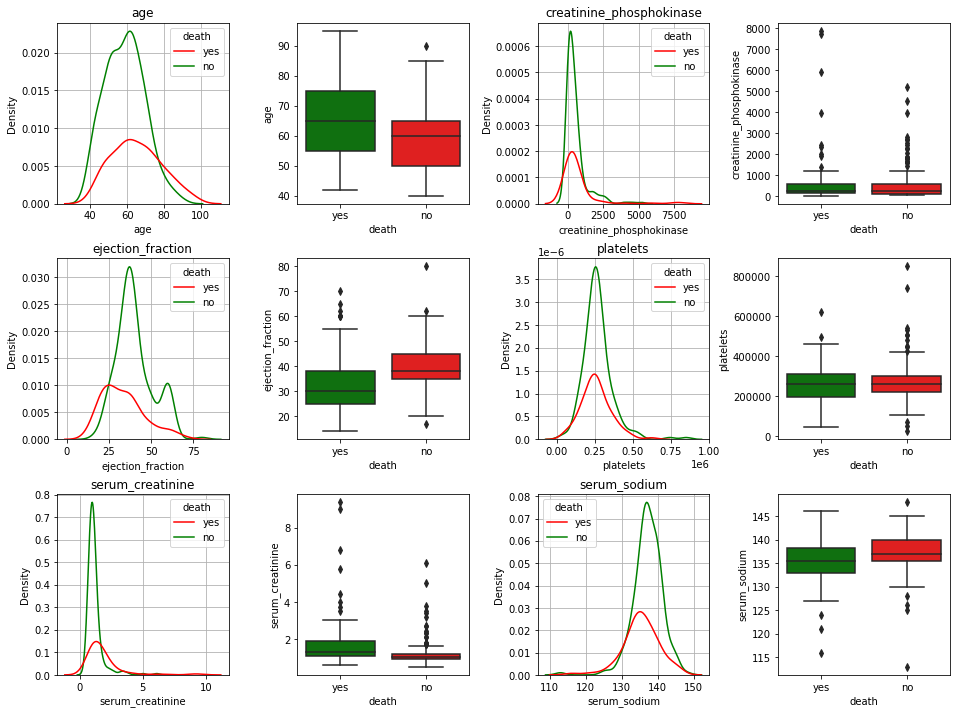

In [34]:
continous_var = ['age', 'creatinine_phosphokinase', 
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
plt.figure(figsize=(16, 25))

for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace = 0.3, wspace=0.4)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(col, data=df, hue = "death", 
                label=["alive", "not alive"], palette=["red", "green"])
    #sns.kdeplot(df.loc[df["death"]=="yes", col], label="alive", color="red")
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y=col, data=df, x="death", palette=["green", "red"])
    

In [35]:
y = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction", "platelets", 
                        "serum_creatinine", "serum_sodium", "time"].agg([np.mean, np.median])
y

<ipython-input-35-85beddd22d04>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction", "platelets",


creatinine_phosphokinase        ejection_fraction             platelets  \
                          mean median              mean median           mean   
death                                                                           
no                  540.054187    245          40.26601     38  266657.489901   
yes                 670.197917    259          33.46875     30  256381.044792   

                serum_creatinine        serum_sodium               time         
         median             mean median         mean median        mean median  
death                                                                           
no     263000.0         1.184877    1.0   137.216749  137.0  158.339901  172.0  
yes    258500.0         1.835833    1.3   135.375000  135.5   70.885417   44.5

In [36]:
df.groupby(['sex1', 'high_blood_pressure',
           'death']).size().unstack().fillna(0).apply(lambda x: x/x.sum(),
                                                     axis=1)

death                             no       yes
sex1   high_blood_pressure                    
Female 0                    0.721311  0.278689
       1                    0.613636  0.386364
Male   0                    0.699248  0.300752
       1                    0.639344  0.360656

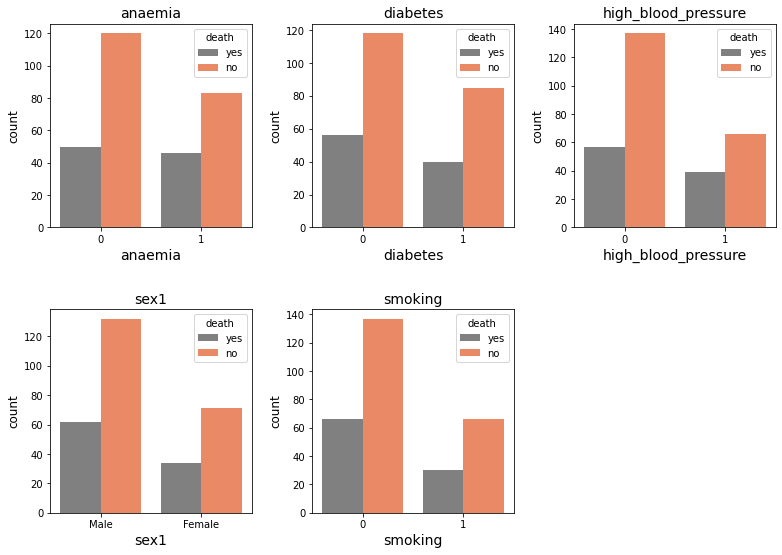

In [38]:
binary_var = ['anaemia', 'diabetes', 'high_blood_pressure',
             'sex1', 'smoking']
plt.figure(figsize=(13, 9))

for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, hue="death", palette = ['gray', "coral"])

In [40]:
x = pd.crosstab(df["sex1"], df['death'])
x

death,no,yes
sex1,,
Female,71,34
Male,132,62


In [41]:
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
sex1,,
Female,0.676190,0.323810
Male,0.680412,0.319588


In [43]:
an = pd.crosstab(df["anaemia"], df['death'])
an

death,no,yes
anaemia,,
0,120,50
1,83,46


In [46]:
an.apply(lambda x: x/x.sum(), axis=1)

death,no,yes
anaemia,,
0,0.705882,0.294118
1,0.643411,0.356589


C:\Users\rashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


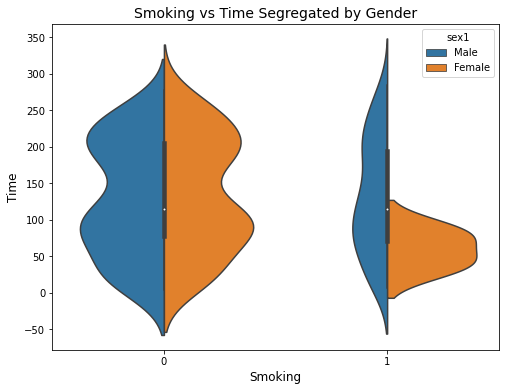

In [47]:
plt.figure(figsize=(8, 6))
a = sns.violinplot(df.smoking, df.time, hue=df.sex1, split=True)
plt.title("Smoking vs Time Segregated by Gender", fontsize=14)
plt.xlabel("Smoking", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.show()

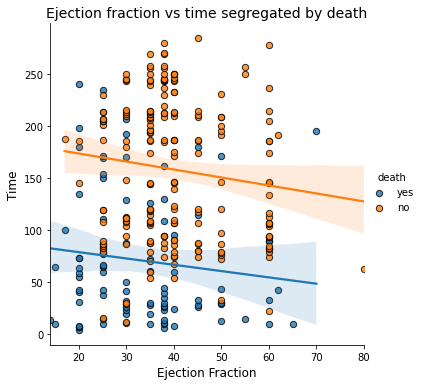

In [48]:
sns.lmplot(x = "ejection_fraction", y = "time",
          hue = "death", data = df, scatter_kws=dict(s=40,
                                                    edgecolor = 'black'))
plt.xlabel("Ejection Fraction", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title("Ejection fraction vs time segregated by death", fontsize=14)
plt.show()

<Figure size 1600x640 with 0 Axes>

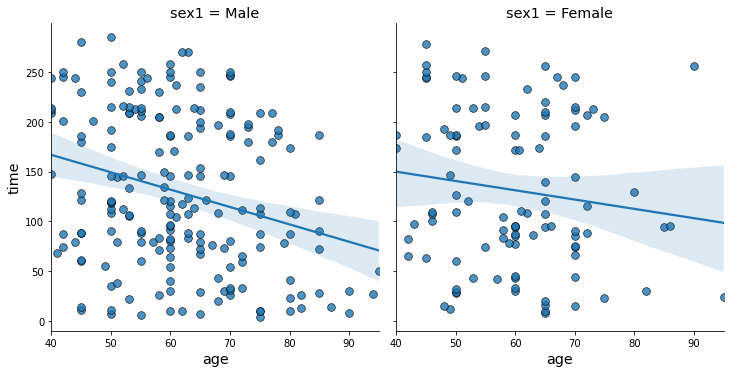

In [49]:
fig = plt.figure(figsize=(20, 8), dpi=80)
g = sns.lmplot(x='age', y='time', 
               data = df, 
               robust = True,
              palette="Set1", col="sex1",
              scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='x-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')

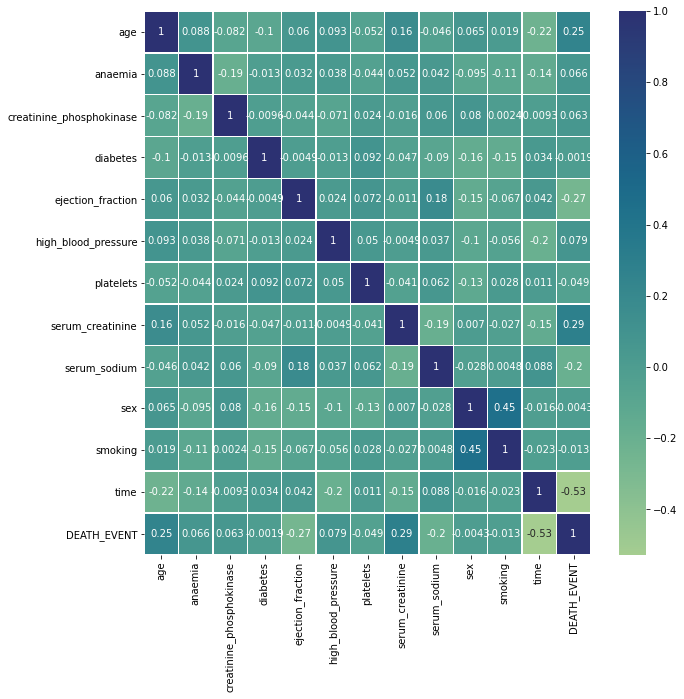

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, linewidth=0.5, cmap="crest")
plt.show()

In [51]:
df = df.drop(columns=['sex1', 'death'])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [52]:
df.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


no null values

In [53]:
df2 = df
continuous_var = ['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
for i in continous_var:
    df2[i] = df2[i]/max(df2[i])

In [54]:
y = df2['DEATH_EVENT']

In [55]:
X = df2.drop(columns=['DEATH_EVENT'])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8133333333333334
Precision: 0.8727272727272727
Recall: 0.8727272727272727
F Score: 0.8727272727272727
Confusion Matrix:
 [[48  7]
 [ 7 13]]


C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(random_state=0, C=0.1).fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.84
Precision: 0.8771929824561403
Recall: 0.9090909090909091
F Score: 0.8928571428571428
Confusion Matrix:
 [[50  5]
 [ 7 13]]


C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(random_state=0, C=0.1).fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.84
Precision: 0.8771929824561403
Recall: 0.9090909090909091
F Score: 0.8928571428571428
Confusion Matrix:
 [[50  5]
 [ 7 13]]


C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=21, max_depth = 7, max_leaf_nodes=6).fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.84
Precision: 0.9215686274509803
Recall: 0.8545454545454545
F Score: 0.8867924528301887
Confusion Matrix:
 [[47  8]
 [ 4 16]]


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 8, random_state = 0).fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8533333333333334
Precision: 0.94
Recall: 0.8545454545454545
F Score: 0.8952380952380952
Confusion Matrix:
 [[47  8]
 [ 3 17]]


In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 9, random_state = 0).fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8533333333333334
Precision: 0.94
Recall: 0.8545454545454545
F Score: 0.8952380952380952
Confusion Matrix:
 [[47  8]
 [ 3 17]]
